## Treat training dataset

### import library and initial analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.impute import KNNImputer
%matplotlib inline

In [2]:
train_features = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test_features = pd.read_csv('data/test_features.csv')

In [3]:
print(f'shape of train_features: {train_features.shape}')
print(f'shape of train_labels: {train_labels.shape}')
print(f'shape of test_features: {test_features.shape}')

shape of train_features: (3817, 16)
shape of train_labels: (3817, 1)
shape of test_features: (3818, 17)


In [4]:
train_features['jumlah_promosi'] = train_labels.copy()
df_train = train_features.copy()
df_train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [6]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

In [7]:
df_train.isna().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
jumlah_promosi                0
dtype: int64

Text(0.5, 1.0, 'Number of digit classes')

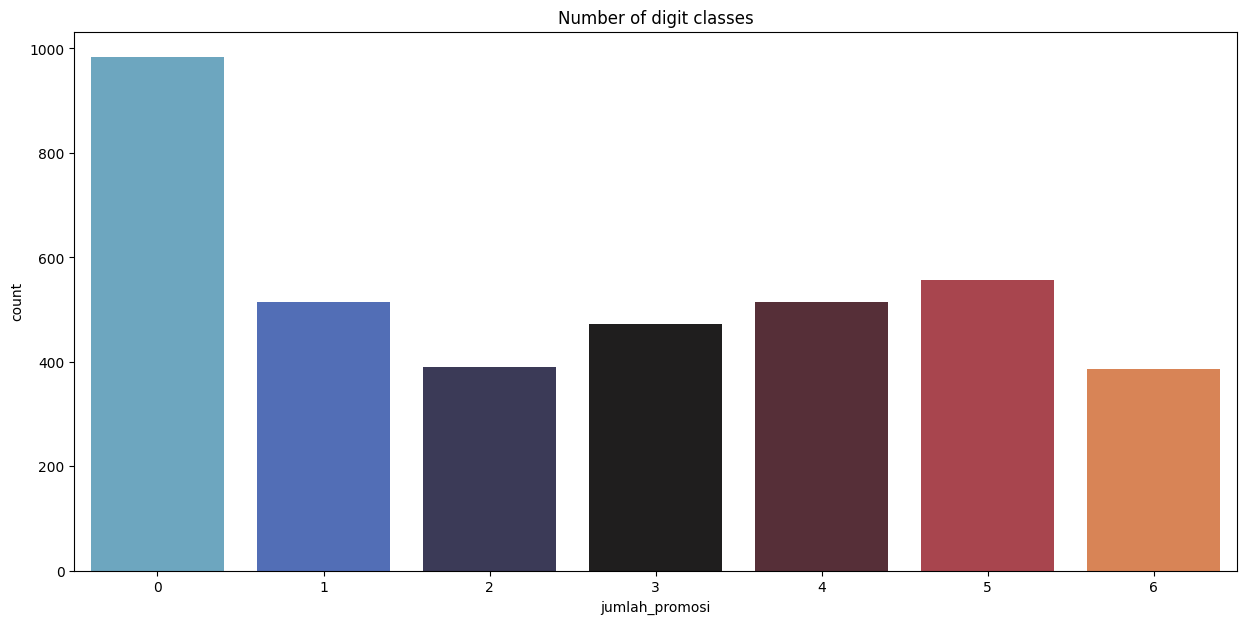

In [9]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(df_train, x='jumlah_promosi', palette="icefire")
plt.title("Number of digit classes")
# df_train.value_counts()

### Data Preprocessing

#### Handling categorical

In [7]:
df_train['lama_membership'] = pd.to_datetime(df_train['tanggal_menjadi_anggota'])
test_features['lama_membership'] = pd.to_datetime(test_features['tanggal_menjadi_anggota'])


df_train['lama_membership'] = (pd.Timestamp.now() - df_train['lama_membership']).dt.days
test_features['lama_membership'] = (pd.Timestamp.now() - test_features['lama_membership']).dt.days

df_train = df_train.drop(columns=['tanggal_menjadi_anggota'])
test_features = test_features.drop(columns=['tanggal_menjadi_anggota'])

In [8]:
df_train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi,lama_membership
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2,3645.0
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,0,4059.0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,4,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,5,NaN
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,1,3610.0
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,0,3824.0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,0,3954.0


In [9]:
test_features

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,lama_membership
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,3917.0
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,3694.0
3814,3334,1972,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,NaN
3815,3478,1968,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,NaN,0.0,1.0,0.0,NaN
3816,89,1966,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,NaN,0.0,3.0,5.0,3.0,0.0,3750.0


In [10]:
cat_cols = df_train.select_dtypes(include=['object']).columns
for i in cat_cols:
    print(f'{df_train[i].value_counts()}')
    print('\n')

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
5              2
Name: pendidikan, dtype: int64


Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
5                     1
Name: status_pernikahan, dtype: int64




In [11]:
df_train['pendidikan'] = df_train['pendidikan'].replace('5', np.nan)
df_train['status_pernikahan'] = df_train['status_pernikahan'].replace('5', np.nan)

test_features['pendidikan'] = test_features['pendidikan'].replace('5', np.nan)
test_features['status_pernikahan'] = test_features['status_pernikahan'].replace('5', np.nan)

for i in cat_cols:
    print(f'{df_train[i].value_counts()}')
    print(f'{test_features[i].value_counts()}')
    print('\n')

Sarjana     1841
Magister     856
SMA          435
Doktor       403
SMP           91
Name: pendidikan, dtype: int64
Sarjana     1935
Magister     803
SMA          408
Doktor       404
SMP           62
Name: pendidikan, dtype: int64


Rencana Menikah    1271
Menikah            1114
Sendiri             965
Cerai               214
Cerai Mati           40
Name: status_pernikahan, dtype: int64
Rencana Menikah    1272
Menikah            1126
Sendiri             972
Cerai               206
Cerai Mati           59
Name: status_pernikahan, dtype: int64




In [12]:
def apply_custom_ordinal_encoding_mappings(df):
    
    ordinal_encoding_columns_mappings = {
    
        'pendidikan': {'SMP': 1, 'SMA': 2, 'Sarjana': 3, 'Magister': 4, 'Doktor': 5},
        'status_pernikahan': {'Sendiri': 1, 'Rencana Menikah': 2, 'Menikah': 4, 'Cerai': 3, 'Cerai Mati': 3}
    }
    
    for col, mapping in ordinal_encoding_columns_mappings.items():
        
        if col in df.columns:
            
            df[col] = df[col].map(mapping)
        
    return df

In [13]:
# encode pendidikan dan status pernikahan
df_train[cat_cols] = apply_custom_ordinal_encoding_mappings(df_train[cat_cols])
test_features[cat_cols] = apply_custom_ordinal_encoding_mappings(test_features[cat_cols])

In [14]:
for i in cat_cols:
    print(f'{df_train[i].value_counts()}')
    print('\n')

3.0    1841
4.0     856
2.0     435
5.0     403
1.0      91
Name: pendidikan, dtype: int64


2.0    1271
4.0    1114
1.0     965
3.0     254
Name: status_pernikahan, dtype: int64




In [15]:
for i in cat_cols:
    print(f'{test_features[i].value_counts()}')
    print('\n')

3.0    1935
4.0     803
2.0     408
5.0     404
1.0      62
Name: pendidikan, dtype: int64


2.0    1272
4.0    1126
1.0     972
3.0     265
Name: status_pernikahan, dtype: int64




In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3817 non-null   int64  
 1   pendidikan          3626 non-null   float64
 2   status_pernikahan   3604 non-null   float64
 3   pendapatan          3627 non-null   float64
 4   jumlah_anak_balita  3627 non-null   float64
 5   jumlah_anak_remaja  3613 non-null   float64
 6   terakhir_belanja    3645 non-null   float64
 7   belanja_buah        3636 non-null   float64
 8   belanja_daging      3639 non-null   float64
 9   belanja_ikan        3624 non-null   float64
 10  belanja_kue         3603 non-null   float64
 11  pembelian_diskon    3639 non-null   float64
 12  pembelian_web       3652 non-null   float64
 13  pembelian_toko      3648 non-null   float64
 14  keluhan             3621 non-null   float64
 15  jumlah_promosi      3817 non-null   int64  
 16  lama_m

In [18]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3818 non-null   int64  
 1   tahun_kelahiran     3818 non-null   int64  
 2   pendidikan          3612 non-null   float64
 3   status_pernikahan   3635 non-null   float64
 4   pendapatan          3615 non-null   float64
 5   jumlah_anak_balita  3609 non-null   float64
 6   jumlah_anak_remaja  3608 non-null   float64
 7   terakhir_belanja    3617 non-null   float64
 8   belanja_buah        3632 non-null   float64
 9   belanja_daging      3623 non-null   float64
 10  belanja_ikan        3622 non-null   float64
 11  belanja_kue         3631 non-null   float64
 12  pembelian_diskon    3639 non-null   float64
 13  pembelian_web       3638 non-null   float64
 14  pembelian_toko      3632 non-null   float64
 15  keluhan             3625 non-null   float64
 16  lama_m

#### Handling NaN

In [17]:
def null_statistics(df):
    
    # Create a DataFrame to show column information

    null_info = pd.DataFrame({
        'Column Name': df.columns,
        'Column Data Type': df.dtypes,
        'Null Values': df.isnull().sum(),
        'Null Percentage': df.isnull().mean() * 100
    })

    null_info.reset_index(drop=True, inplace=True)  # Reset the index

    # Display the DataFrame
    
    null_info = null_info[null_info["Null Values"] > 0]
    null_info = null_info.sort_values(by = 'Null Values', ascending = False).reset_index(drop=True)
    
    print("")
    print(f"There are {null_info.shape[0]} columns ({null_info.shape[0] / len(df.columns) * 100:,.2f} %) with Null values out of {len(df.columns)} columns in Dataframe.")
    print("")
    
    return null_info

In [18]:
# null statistics for train data
train_null_data = null_statistics(df_train)
train_null_data


There are 15 columns (88.24 %) with Null values out of 17 columns in Dataframe.



,Column Name,Column Data Type,Null Values,Null Percentage
0,lama_membership,float64,2752,72.098507
1,belanja_kue,float64,214,5.606497
2,status_pernikahan,float64,213,5.580299
3,jumlah_anak_remaja,float64,204,5.344511
4,keluhan,float64,196,5.134923
5,belanja_ikan,float64,193,5.056327
6,pendidikan,float64,191,5.003930
7,pendapatan,float64,190,4.977731
8,jumlah_anak_balita,float64,190,4.977731
9,belanja_buah,float64,181,4.741944


In [19]:
# null statistics for test data
test_features_null_data = null_statistics(test_features)
test_features_null_data


There are 15 columns (88.24 %) with Null values out of 17 columns in Dataframe.



,Column Name,Column Data Type,Null Values,Null Percentage
0,lama_membership,float64,2759,72.262965
1,jumlah_anak_remaja,float64,210,5.500262
2,jumlah_anak_balita,float64,209,5.474070
3,pendidikan,float64,206,5.395495
4,pendapatan,float64,203,5.316920
5,terakhir_belanja,float64,201,5.264536
6,belanja_ikan,float64,196,5.133578
7,belanja_daging,float64,195,5.107386
8,keluhan,float64,193,5.055003
9,belanja_kue,float64,187,4.897852


In [20]:
df_train_null_handled = df_train.copy()
test_features_null_handled = test_features.copy()

In [21]:
from sklearn.impute import SimpleImputer

def impute_with_knn(data):
    num_columns = data.select_dtypes(['int64', 'float64']).columns

    num_imputer = KNNImputer(n_neighbors=5, weights='distance')
    num_imputed_data = num_imputer.fit_transform(data[num_columns])
    num_imputed_byKNN_df = pd.DataFrame(num_imputed_data, columns=num_columns)
    return num_imputed_byKNN_df


In [22]:
# impute null values in train data with knn

df_train_null_handled = impute_with_knn(df_train_null_handled)
df_train_null_handled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3817 non-null   float64
 1   pendidikan          3817 non-null   float64
 2   status_pernikahan   3817 non-null   float64
 3   pendapatan          3817 non-null   float64
 4   jumlah_anak_balita  3817 non-null   float64
 5   jumlah_anak_remaja  3817 non-null   float64
 6   terakhir_belanja    3817 non-null   float64
 7   belanja_buah        3817 non-null   float64
 8   belanja_daging      3817 non-null   float64
 9   belanja_ikan        3817 non-null   float64
 10  belanja_kue         3817 non-null   float64
 11  pembelian_diskon    3817 non-null   float64
 12  pembelian_web       3817 non-null   float64
 13  pembelian_toko      3817 non-null   float64
 14  keluhan             3817 non-null   float64
 15  jumlah_promosi      3817 non-null   float64
 16  lama_m

In [23]:
# impute test data with knn

test_features_null_handled = impute_with_knn(test_features_null_handled)
test_features_null_handled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3818 non-null   float64
 1   tahun_kelahiran     3818 non-null   float64
 2   pendidikan          3818 non-null   float64
 3   status_pernikahan   3818 non-null   float64
 4   pendapatan          3818 non-null   float64
 5   jumlah_anak_balita  3818 non-null   float64
 6   jumlah_anak_remaja  3818 non-null   float64
 7   terakhir_belanja    3818 non-null   float64
 8   belanja_buah        3818 non-null   float64
 9   belanja_daging      3818 non-null   float64
 10  belanja_ikan        3818 non-null   float64
 11  belanja_kue         3818 non-null   float64
 12  pembelian_diskon    3818 non-null   float64
 13  pembelian_web       3818 non-null   float64
 14  pembelian_toko      3818 non-null   float64
 15  keluhan             3818 non-null   float64
 16  lama_m

In [24]:
# def impute_cat_with_mode(data):
#     cat_columns = data.select_dtypes(['object']).columns

#     for col in cat_columns:
#         data[col].fillna(df[col].mode()[0], inplace=True)
    
#     return data[cat_columns]

# df_null_handled[['pendidikan', 'status_pernikahan']] = impute_cat_with_mode(df_null_handled)

In [27]:
# # df null handled by mode and knn = df_mk
# num_columns = df_null_handled.select_dtypes(['int64', 'float64']).columns

# df_null_handled[num_columns] = num_imputed_byKNN_df
# # df_null_handled[num_columns] = num_imputed_df
# df_mk = df_null_handled.copy()

# df_mk.isna().sum()

#### Duplicate Values Exploration

In [25]:
print(f"shape train data{df_train_null_handled.shape}")
print(f"shape test data{test_features_null_handled.shape}")

shape train data(3817, 17)
shape test data(3818, 17)


In [29]:
print(f"{df_train_null_handled.duplicated().sum()}")
print(f"{test_features_null_handled.duplicated().sum()}")

0
0


#### Outliers Exploration

##### handling outlier for training data

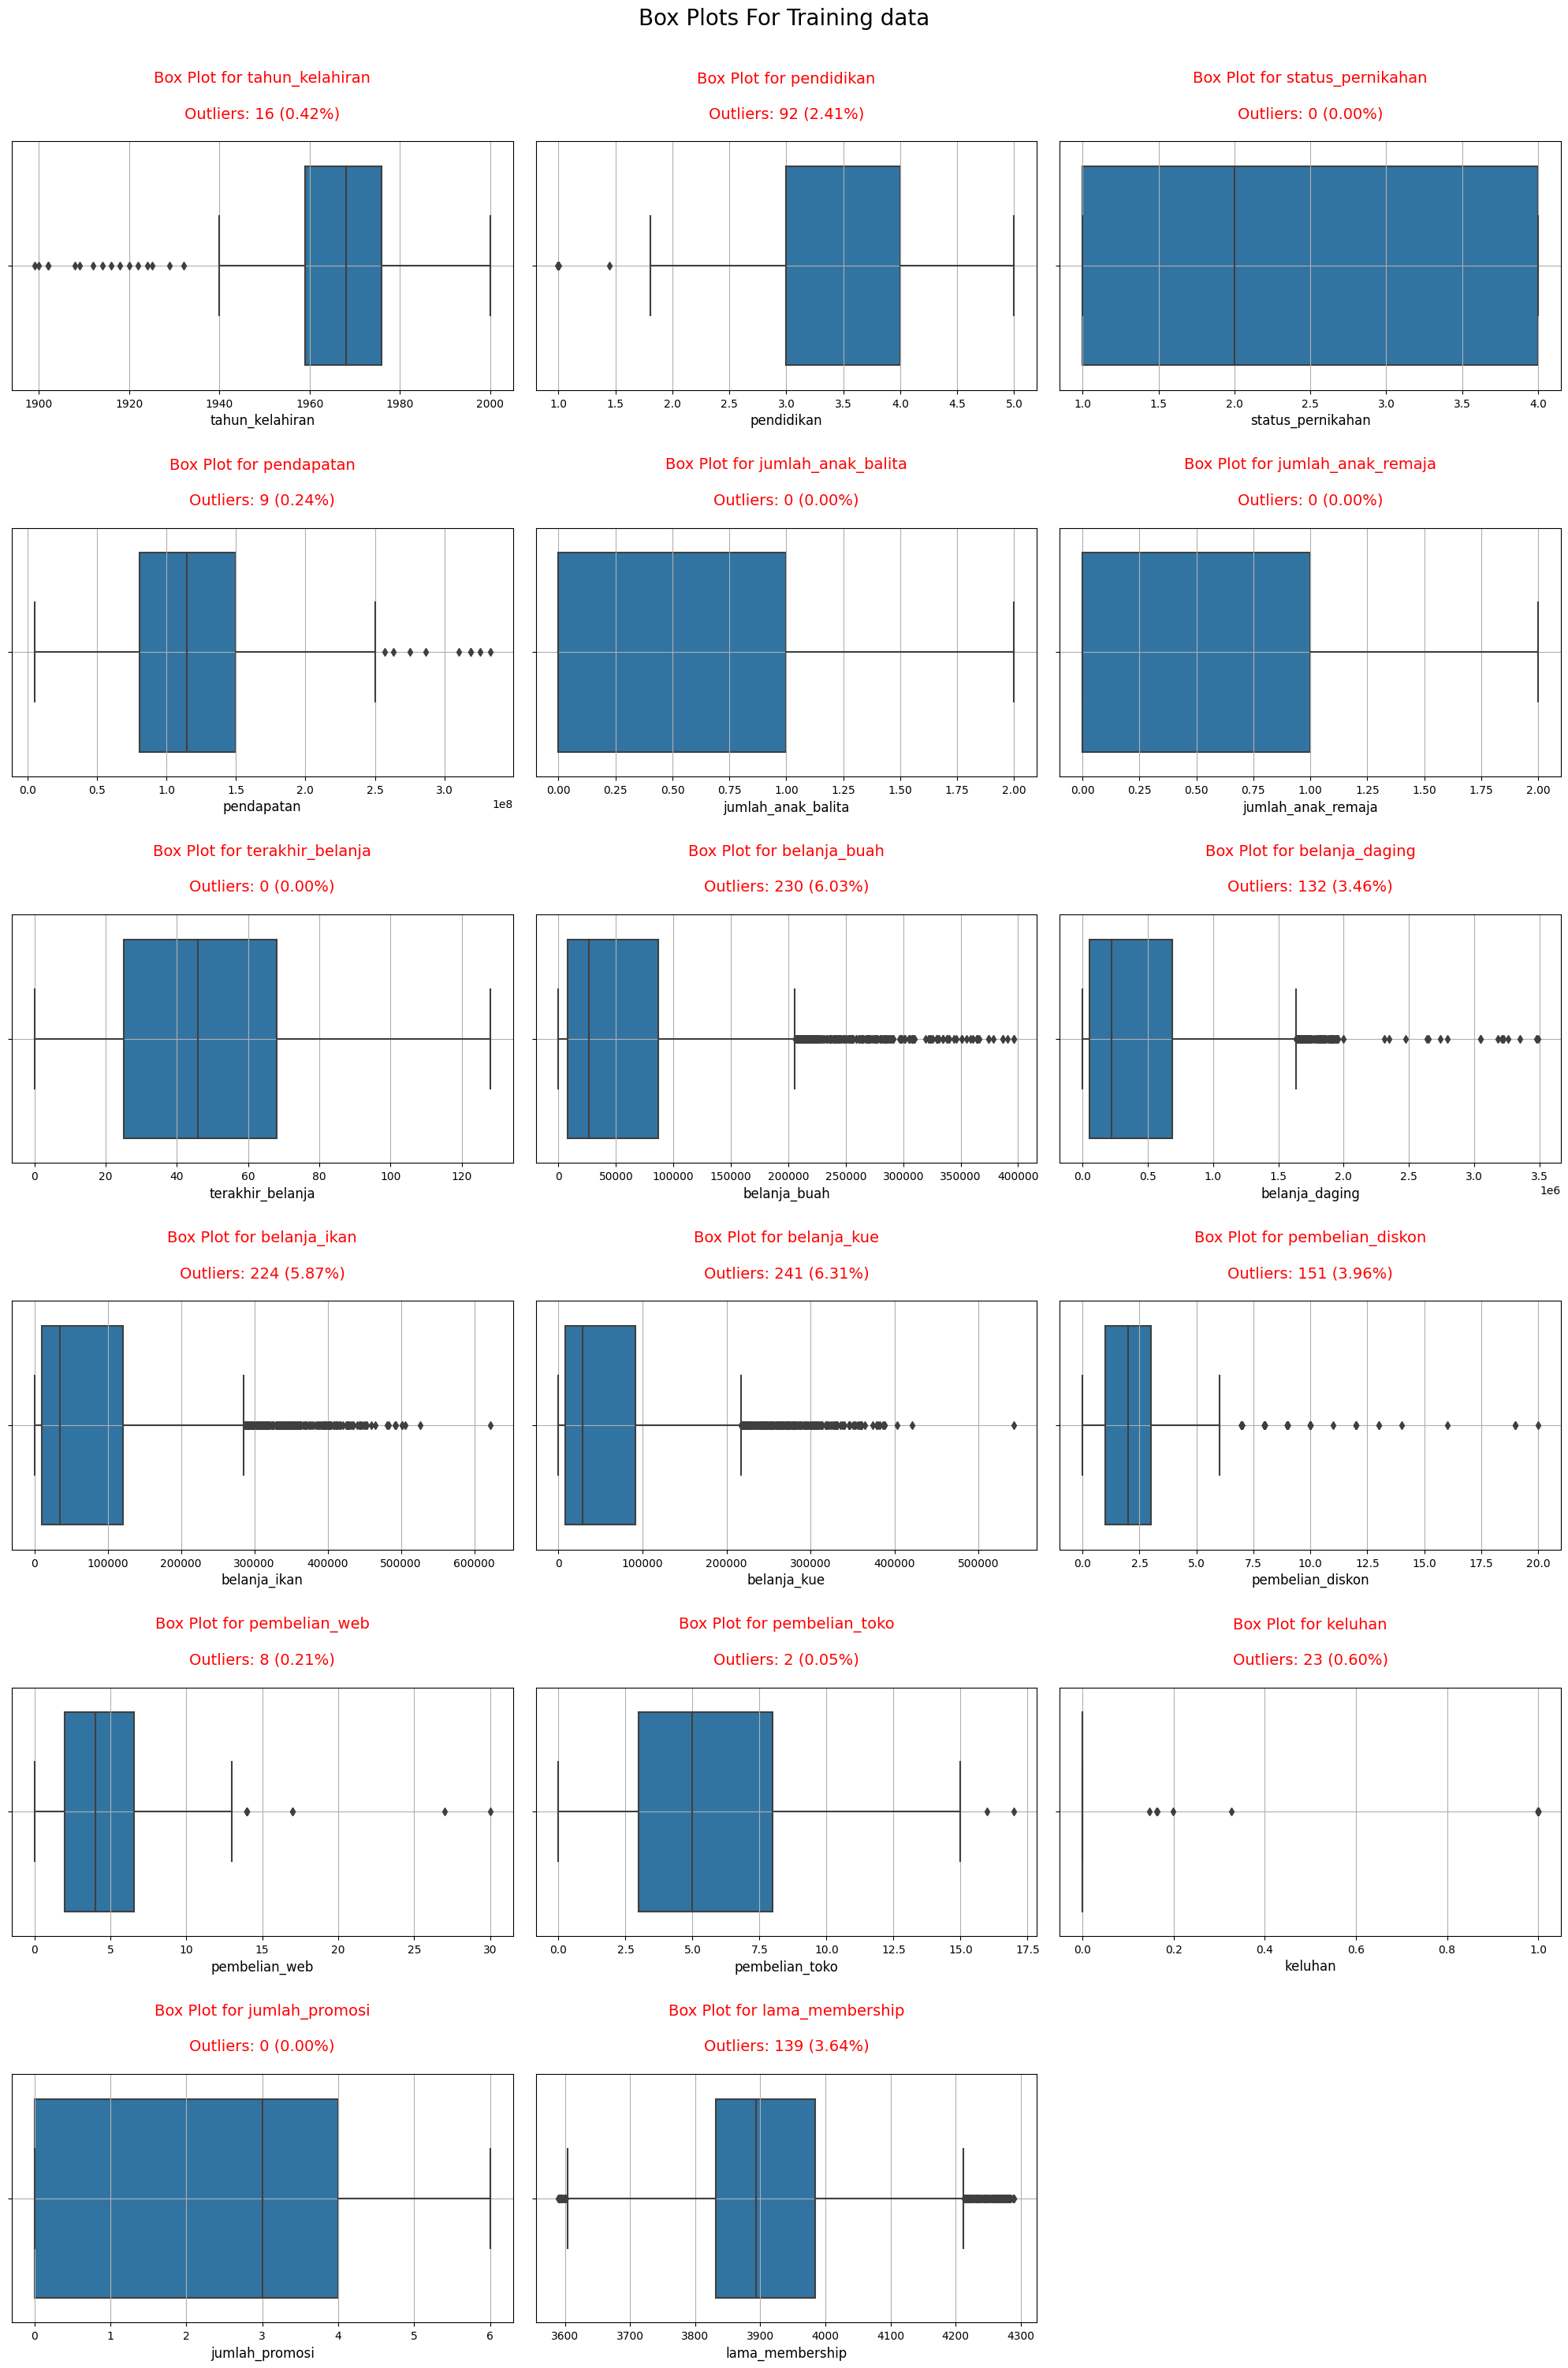

In [26]:
# Select numerical columns from df_train_null_handled

numerical_columns = df_train_null_handled.select_dtypes(include='number')

# Sort columns by correlation with 'SalePrice' in ascending order

sorted_columns = numerical_columns.columns

# Calculate the number of rows and columns for the subplots

num_plots = len(sorted_columns)

# Calculate the number of rows and columns for the subplots

num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Add a main title to the entire set of subplots

fig.suptitle("Box Plots For Training data", y=1, fontsize=20)

# Create a box plot for each feature

for i, col in enumerate(sorted_columns):
    
    # Calculate current row and column for the subplot
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate and add information about outliers

    Q1 = df_train_null_handled[col].quantile(0.25)
    Q3 = df_train_null_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = (df_train_null_handled[col] < Q1 - 1.5 * IQR) | (df_train_null_handled[col] > Q3 + 1.5 * IQR)
    percent_iqr_outliers = (sum(iqr_outliers) / len(df_train_null_handled)) * 100
    
    sns.boxplot(x=df_train_null_handled[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
    axes[row_idx, col_idx].set_title(f"\n"
                                     f'Box Plot for {col}\n'
                                     f"\n"
                                     f'Outliers: {sum(iqr_outliers)} ({percent_iqr_outliers:.2f}%)\n', fontsize=14, color='red')
    
    axes[row_idx, col_idx].grid(True)

# Remove any empty subplots

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout

plt.tight_layout()

plt.show()

In [27]:
# pada kolom tahun_kelahiran, hapus outlier karena agaknya aneh jika terdapat orang di data tersebut yang lahir pada 100 tahun yang lalu

Q1 = df_train_null_handled['tahun_kelahiran'].quantile(0.25)
Q3 = df_train_null_handled['tahun_kelahiran'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris dengan nilai tahun_kelahiran di luar batas bawah dan batas atas
df_train_null_handled_no_outlier = df_train_null_handled[(df_train_null_handled['tahun_kelahiran'] >= lower_bound) & (df_train_null_handled['tahun_kelahiran'] <= upper_bound)]

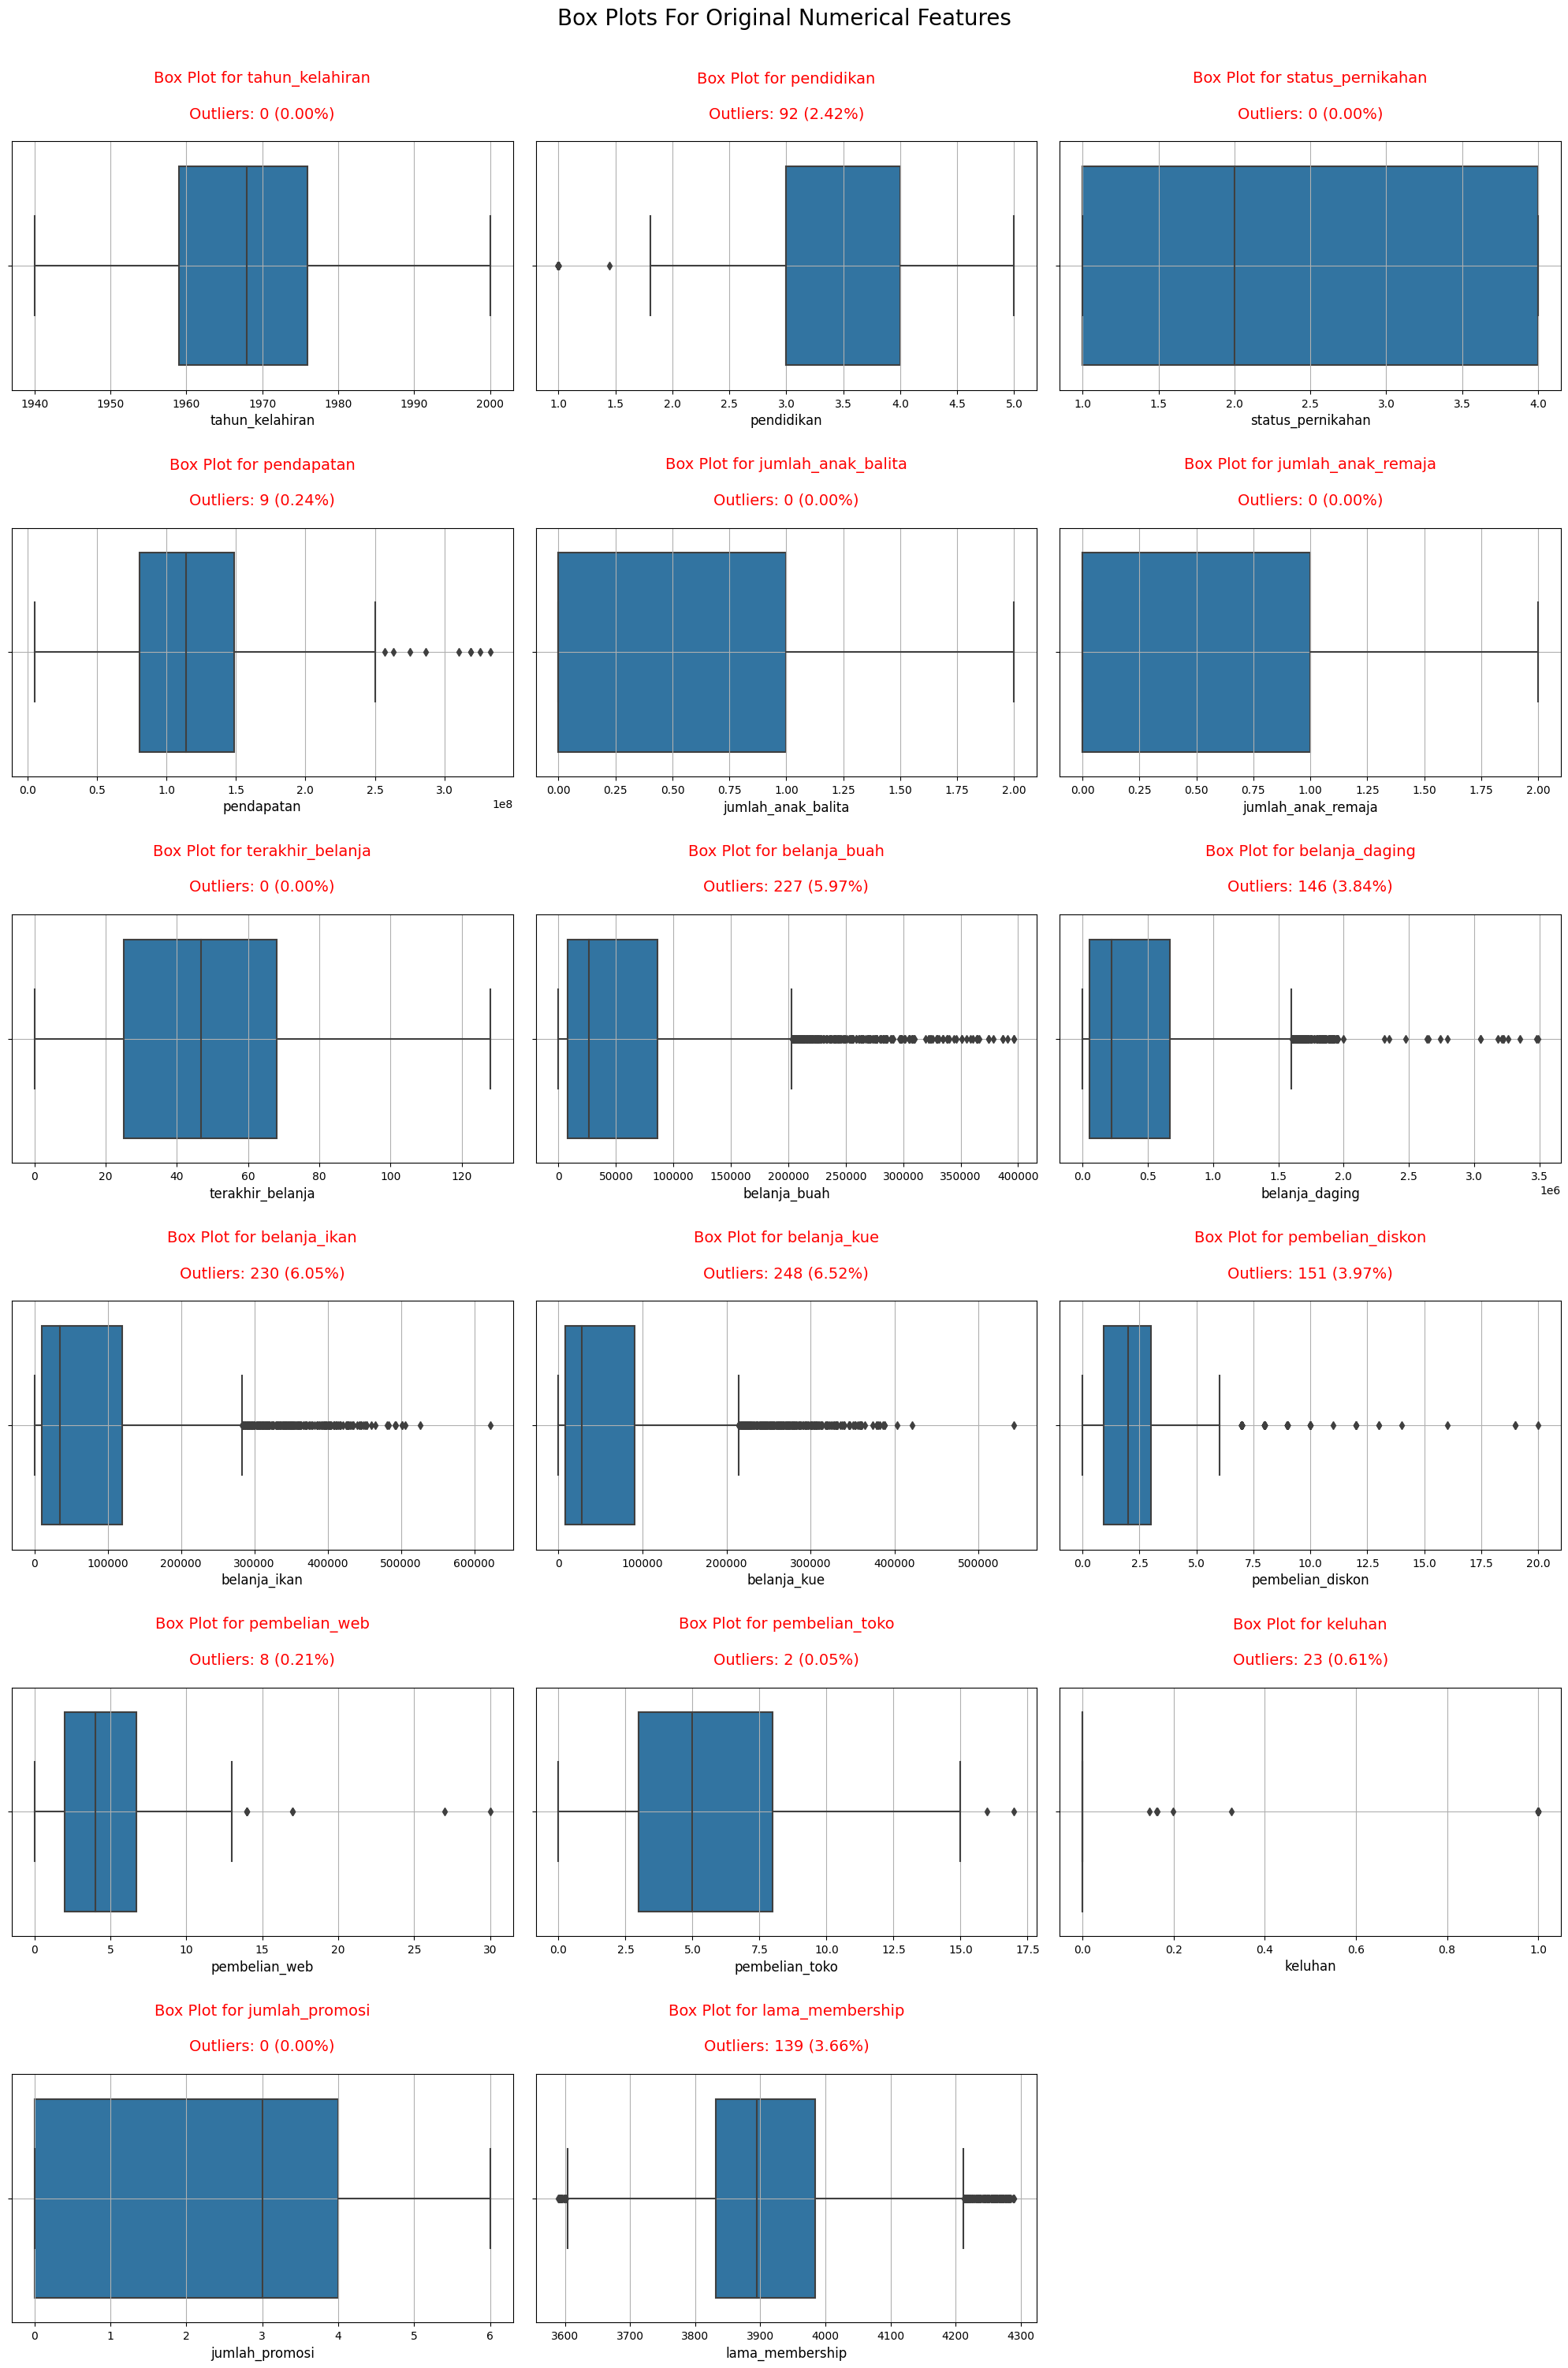

In [28]:
# Select numerical columns from df_train_null_handled_no_outlier

numerical_columns = df_train_null_handled_no_outlier.select_dtypes(include='number')

# Sort columns by correlation with 'SalePrice' in ascending order

sorted_columns = numerical_columns.columns

# Calculate the number of rows and columns for the subplots

num_plots = len(sorted_columns)

# Calculate the number of rows and columns for the subplots

num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Add a main title to the entire set of subplots

fig.suptitle("Box Plots For Original Numerical Features", y=1, fontsize=20)

# Create a box plot for each feature

for i, col in enumerate(sorted_columns):
    
    # Calculate current row and column for the subplot
    
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate and add information about outliers

    Q1 = df_train_null_handled_no_outlier[col].quantile(0.25)
    Q3 = df_train_null_handled_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = (df_train_null_handled_no_outlier[col] < Q1 - 1.5 * IQR) | (df_train_null_handled_no_outlier[col] > Q3 + 1.5 * IQR)
    percent_iqr_outliers = (sum(iqr_outliers) / len(df_train_null_handled_no_outlier)) * 100
    
    sns.boxplot(x=df_train_null_handled_no_outlier[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
    axes[row_idx, col_idx].set_title(f"\n"
                                     f'Box Plot for {col}\n'
                                     f"\n"
                                     f'Outliers: {sum(iqr_outliers)} ({percent_iqr_outliers:.2f}%)\n', fontsize=14, color='red')
    
    axes[row_idx, col_idx].grid(True)

# Remove any empty subplots

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout

plt.tight_layout()

plt.show()

#### Fix Possible Wrong Inputation

In [29]:
df_train_null_handled_no_outlier['jumlah_anak_balita'].value_counts()

0.000000    2645
1.000000    1008
2.000000      30
0.161165       1
0.696537       1
            ... 
0.174875       1
0.770635       1
0.233898       1
0.142355       1
0.390194       1
Name: jumlah_anak_balita, Length: 121, dtype: int64

In [30]:
test_features_null_handled['jumlah_anak_balita'].value_counts()

0.000000    2694
1.000000     975
2.000000      24
0.640940       1
0.045267       1
            ... 
0.362015       1
0.171360       1
0.644519       1
0.882423       1
0.559912       1
Name: jumlah_anak_balita, Length: 128, dtype: int64

terdapat jumlah anak yang continuous

In [31]:
# pembulatan input yang salah
def round_value(value):
    if value % 1 < 0.5:
        return int(np.floor(value))
    else:
        return int(np.ceil(value))
    

# visualize updated data
def show_countplot(data):
  possible_wrong_input_cols = data[['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']]
  num_cols = 2
  num_rows = (possible_wrong_input_cols.shape[1] + num_cols -1 ) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

  # Add a main title to the entire set of subplots
  fig.suptitle("Countplot for outlier column in the dataset", y=1, fontsize=20)


  for i, col in enumerate(possible_wrong_input_cols):

      # Calculate current row and column for the subplot
      row_idx = i // num_cols
      col_idx = i % num_cols

      pic = sns.countplot(possible_wrong_input_cols, x=col, ax=axes[row_idx, col_idx])
      axes[row_idx, col_idx].set_xlabel(col, fontsize=12)
      pic.margins(x=0.1)

  # Remove any empty subplots
  for i in range(len(possible_wrong_input_cols.columns), num_rows * num_cols):
      fig.delaxes(axes.flatten()[i])

  # Adjust layout
  plt.tight_layout()
  plt.show()

possible_wrong_input_cols = ['jumlah_anak_balita', 'jumlah_anak_remaja', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan', 'terakhir_belanja']

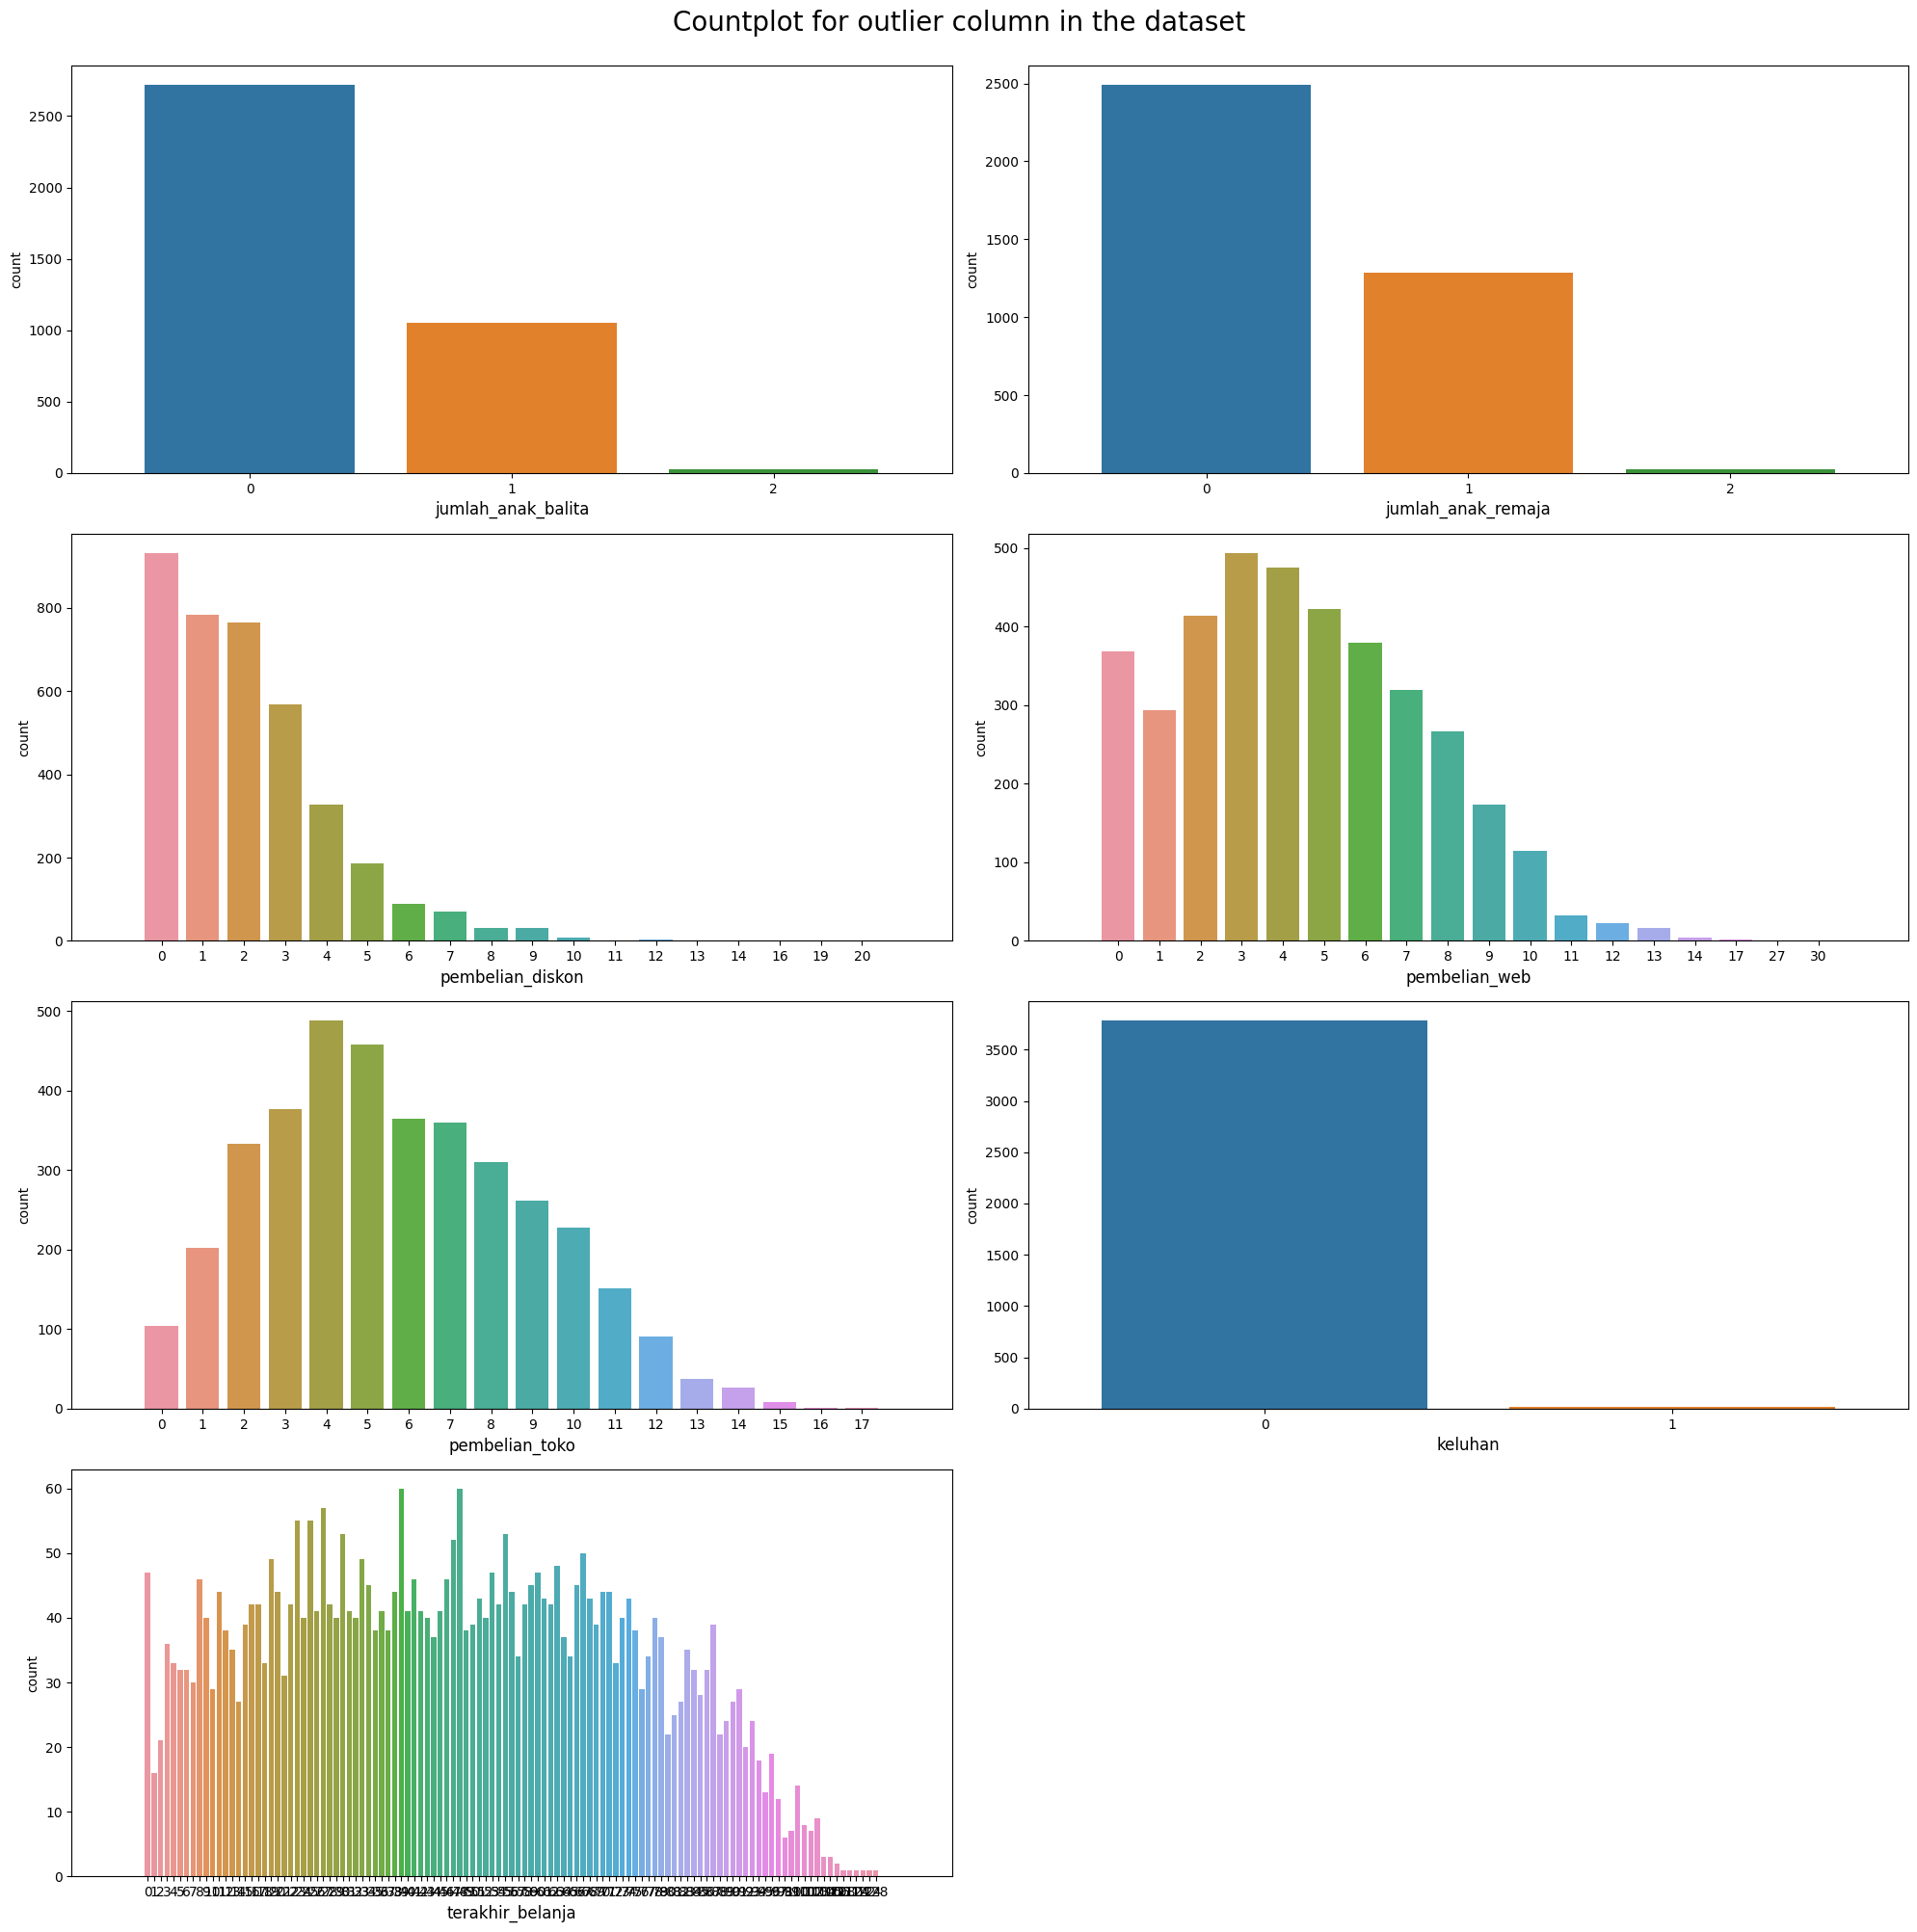

In [32]:
# handling for train data
for col in possible_wrong_input_cols:
    df_train_null_handled_no_outlier[col] = df_train_null_handled_no_outlier[col].apply(lambda x: round_value(x))
    
show_countplot(df_train_null_handled_no_outlier)

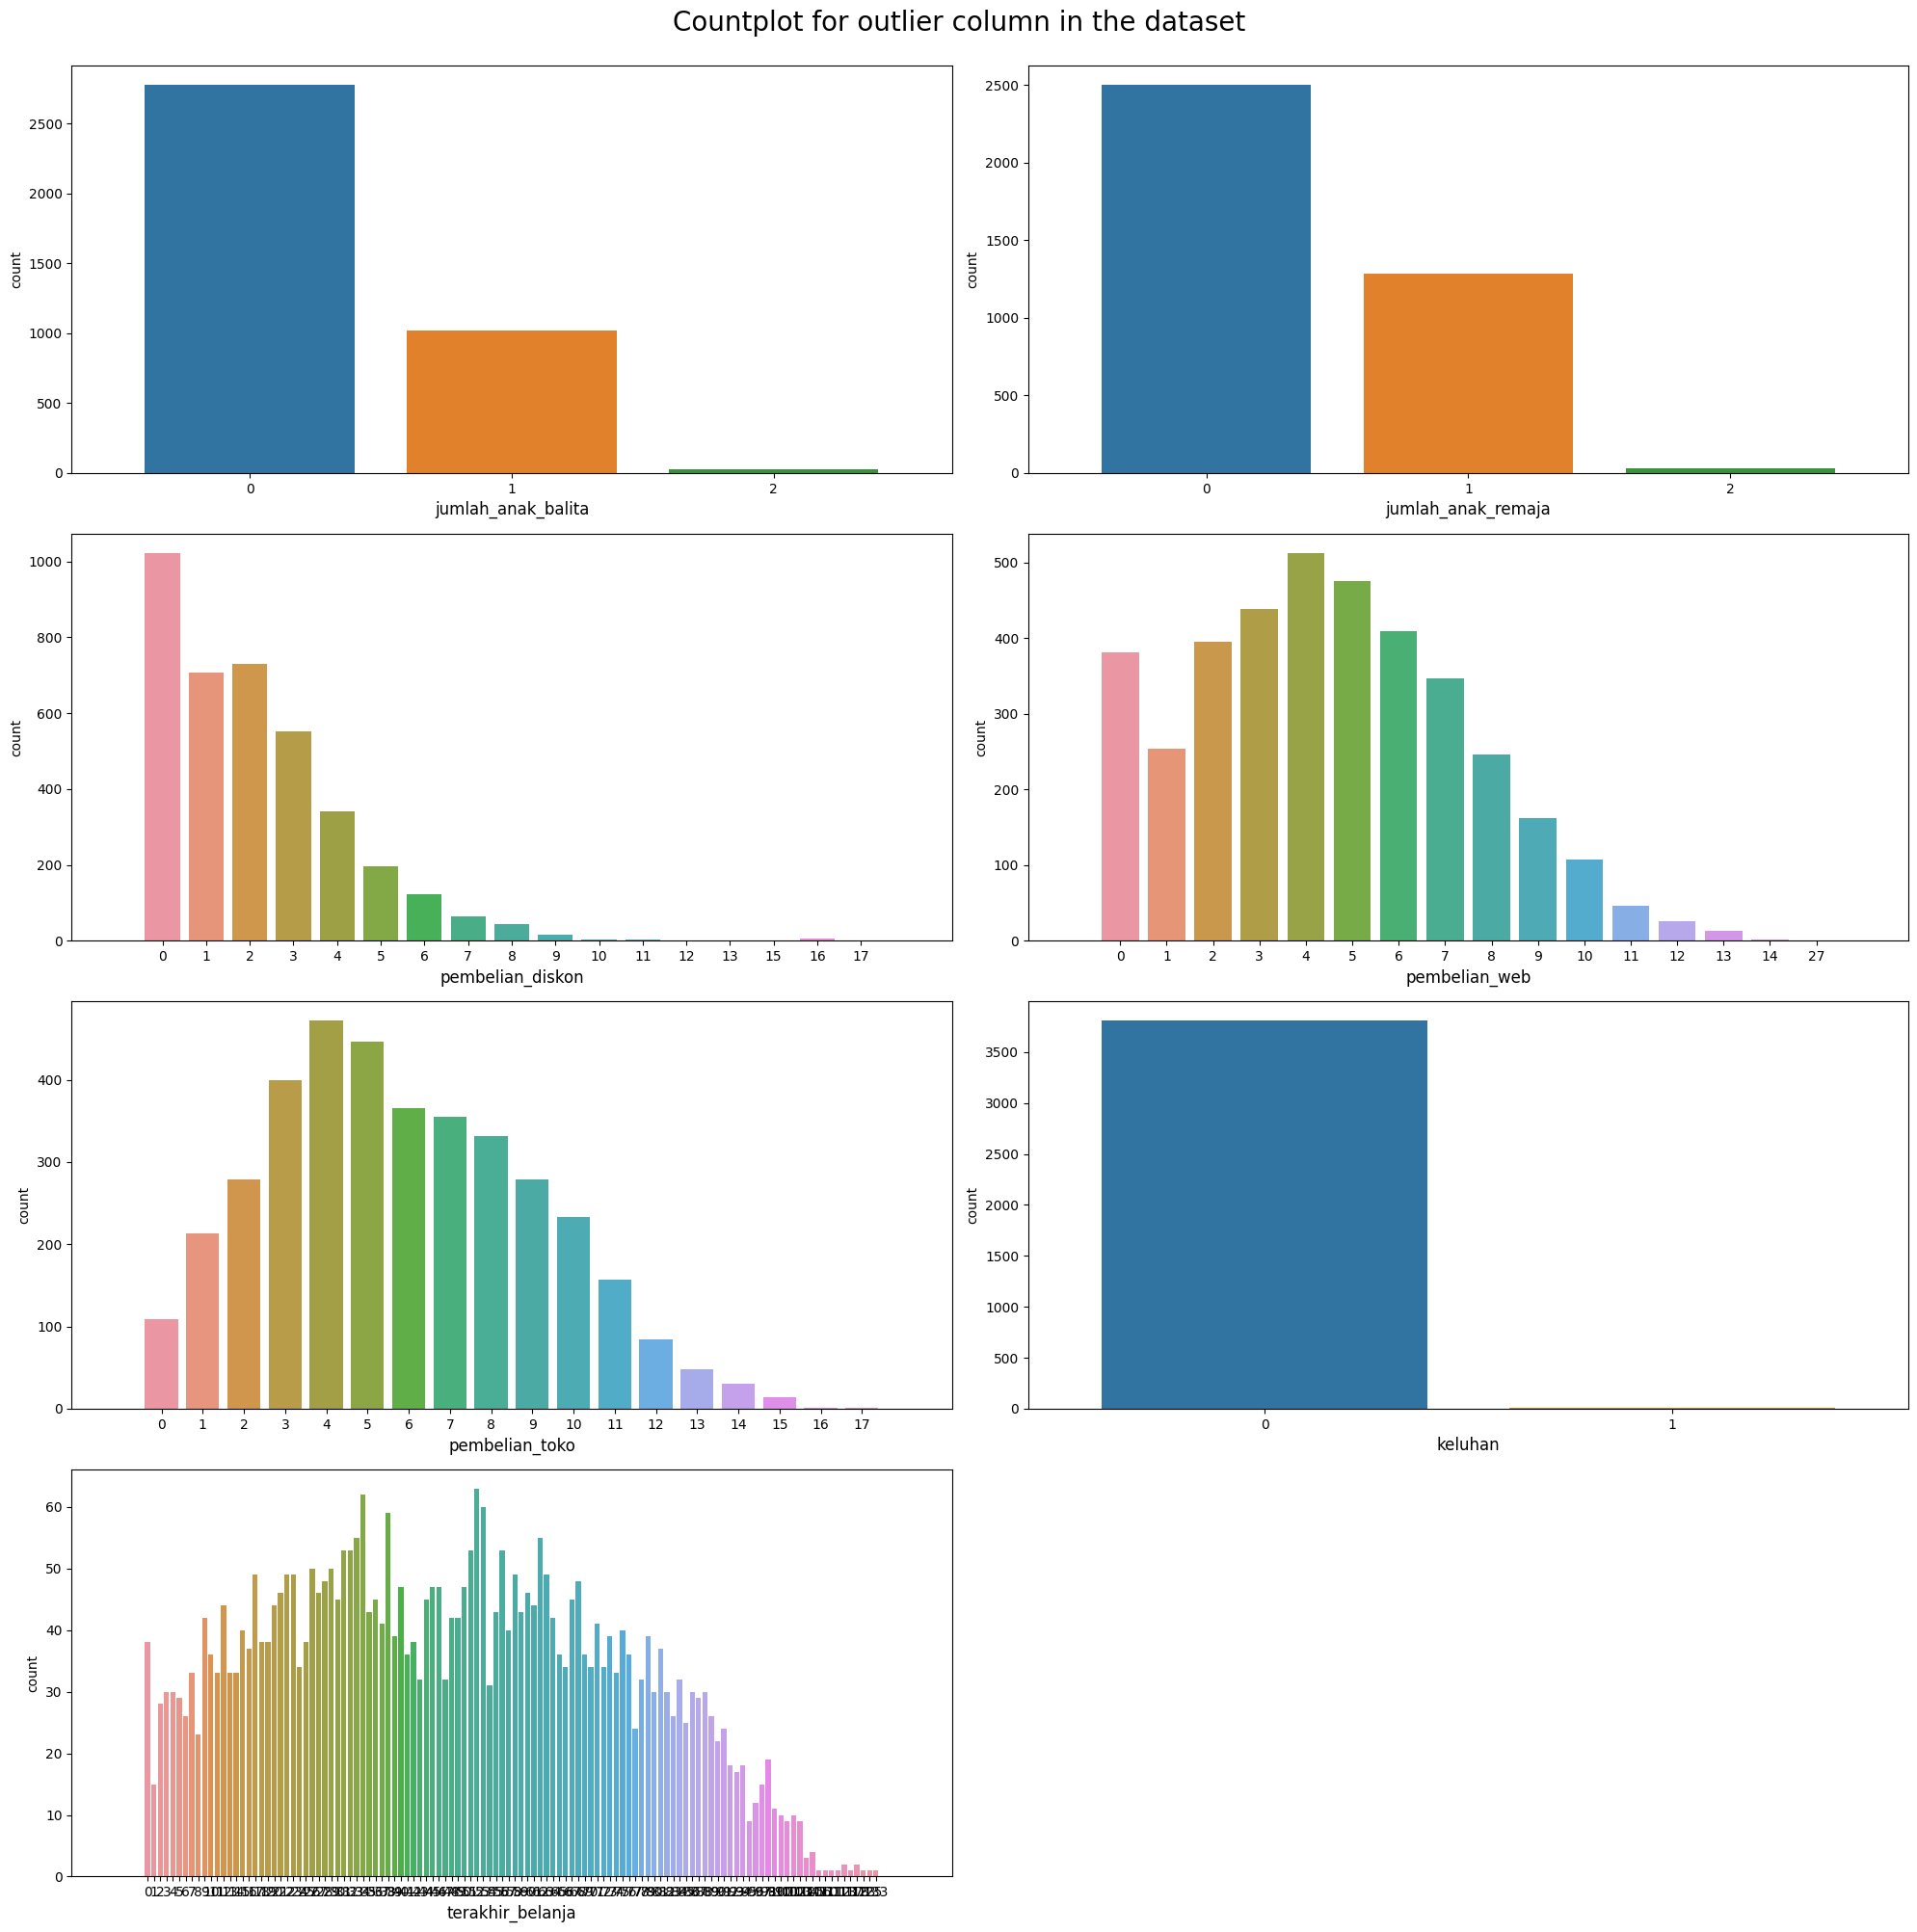

In [33]:
# handling for train data
for col in possible_wrong_input_cols:
    test_features_null_handled[col] = test_features_null_handled[col].apply(lambda x: round_value(x))
    
show_countplot(test_features_null_handled)

### EDA

#### Statistics Summary

In [34]:
df_train_null_handled_no_outlier_desc = df_train_null_handled_no_outlier.describe().T
df_train_null_handled_no_outlier_desc['skewness'] = df_train_null_handled_no_outlier.select_dtypes(include=[np.number]).skew()
df_train_null_handled_no_outlier_desc['range'] = np.ptp(df_train_null_handled_no_outlier.select_dtypes(include=[np.number]), axis=0)
df_train_null_handled_no_outlier_desc

,count,mean,std,min,25%,50%,75%,max,skewness,range
tahun_kelahiran,3801.0,1.968048e+03,1.125222e+01,1940.0,1959.0,1.968000e+03,1976.0,2000.0,0.049103,60.0
pendidikan,3801.0,3.280229e+00,8.857548e-01,1.0,3.0,3.000000e+00,4.0,5.0,0.098854,4.0
status_pernikahan,3801.0,2.418353e+00,1.156888e+00,1.0,1.0,2.000000e+00,4.0,4.0,0.272618,3.0
pendapatan,3801.0,1.137870e+08,4.305300e+07,5073000.0,80732848.0,1.142210e+08,148992000.0,332884000.0,0.024062,327811000.0
jumlah_anak_balita,3801.0,2.928177e-01,4.721435e-01,0.0,0.0,0.000000e+00,1.0,2.0,1.134331,2.0
jumlah_anak_remaja,3801.0,3.517495e-01,4.916971e-01,0.0,0.0,0.000000e+00,1.0,2.0,0.793169,2.0
terakhir_belanja,3801.0,4.701158e+01,2.667875e+01,0.0,25.0,4.700000e+01,68.0,128.0,0.121353,128.0
belanja_buah,3801.0,5.904654e+04,7.267057e+04,0.0,8092.0,2.629900e+04,86201.0,396508.0,1.704395,396508.0
belanja_daging,3801.0,4.361539e+05,5.052807e+05,0.0,50796.0,2.238530e+05,671964.0,3489675.0,1.628809,3489675.0
belanja_ikan,3801.0,8.007009e+04,9.852658e+04,0.0,10115.0,3.439100e+04,119357.0,621600.0,1.672545,621600.0


In [35]:
test_features_null_handled_desc = test_features_null_handled.describe().T
test_features_null_handled_desc['skewness'] = test_features_null_handled.select_dtypes(include=[np.number]).skew()
test_features_null_handled_desc['range'] = np.ptp(test_features_null_handled.select_dtypes(include=[np.number]), axis=0)
test_features_null_handled_desc

,count,mean,std,min,25%,50%,75%,max,skewness,range
ID,3818.0,3.841507e+03,2.198401e+03,2.0,1.950750e+03,3.872500e+03,5.770750e+03,7.634000e+03,-0.009870,7.632000e+03
tahun_kelahiran,3818.0,1.967790e+03,1.180857e+01,1892.0,1.959000e+03,1.968000e+03,1.976000e+03,2.009000e+03,-0.357778,1.170000e+02
pendidikan,3818.0,3.299166e+00,8.546072e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,0.236238,4.000000e+00
status_pernikahan,3818.0,2.420482e+00,1.162651e+00,1.0,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,0.265461,3.000000e+00
pendapatan,3818.0,1.162759e+08,5.039422e+07,2998899.0,8.181109e+07,1.177124e+08,1.507404e+08,1.305740e+09,6.667364,1.302741e+09
jumlah_anak_balita,3818.0,2.794657e-01,4.625934e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.172650,2.000000e+00
jumlah_anak_remaja,3818.0,3.535883e-01,4.958977e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.824368,2.000000e+00
terakhir_belanja,3818.0,4.714484e+01,2.638794e+01,0.0,2.600000e+01,4.600000e+01,6.700000e+01,1.330000e+02,0.160638,1.330000e+02
belanja_buah,3818.0,6.072311e+04,7.569123e+04,0.0,7.773489e+03,2.901300e+04,8.698900e+04,4.086460e+05,1.787851,4.086460e+05
belanja_daging,3818.0,4.483374e+05,5.054438e+05,0.0,5.759975e+04,2.341900e+05,7.096439e+05,3.271191e+06,1.420011,3.271191e+06


In [36]:
df_train_null_handled_no_outlier['total_belanja'] = df_train_null_handled_no_outlier['belanja_buah'] + df_train_null_handled_no_outlier['belanja_ikan'] + df_train_null_handled_no_outlier['belanja_daging'] + df_train_null_handled_no_outlier['belanja_kue']
df_train_null_handled_no_outlier['total_tanggungan'] = df_train_null_handled_no_outlier['jumlah_anak_balita'] + df_train_null_handled_no_outlier['jumlah_anak_remaja']
df_train_null_handled_no_outlier['pendapatan_bersih'] = df_train_null_handled_no_outlier['pendapatan'] - df_train_null_handled_no_outlier['total_belanja']
df_train_null_handled_no_outlier['total_pembelian_platform'] = df_train_null_handled_no_outlier['pembelian_toko'] + df_train_null_handled_no_outlier['pembelian_web']

In [37]:
df_train_null_handled_no_outlier

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,...,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi,lama_membership,total_belanja,total_tanggungan,pendapatan_bersih,total_pembelian_platform
0,1979.0,3.0,2.0,1.068139e+08,0,1,25,50575.0,260967.0,50575.000000,...,2,2,5,0,2.0,3645.000000,3.823470e+05,1,1.064315e+08,7
1,1950.0,3.0,2.0,8.406300e+07,1,0,70,6069.0,44506.0,80920.000000,...,9,6,4,0,0.0,4059.000000,1.517250e+05,1,8.391128e+07,10
2,1966.0,3.0,4.0,1.275326e+08,0,0,45,117611.0,265460.0,96341.000000,...,1,1,7,0,1.0,3897.585802,6.249850e+05,0,1.269076e+08,8
3,1961.0,4.0,2.0,1.655796e+08,0,0,90,206346.0,1613901.0,27725.000000,...,0,7,8,0,4.0,3841.883547,1.973840e+06,0,1.636058e+08,15
4,1970.0,3.0,2.0,1.177032e+08,1,1,78,90563.0,311757.0,40358.000000,...,7,6,5,0,4.0,3838.709191,4.765530e+05,2,1.172266e+08,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,4.0,4.0,7.819947e+07,0,0,33,6069.0,25977.0,3856.000000,...,5,1,0,0,5.0,3876.202723,4.168600e+04,0,7.815778e+07,1
3813,1947.0,5.0,2.0,1.093060e+08,0,1,44,0.0,50575.0,9216.782818,...,3,6,3,0,1.0,3610.000000,5.979178e+04,1,1.092462e+08,9
3814,1974.0,4.0,4.0,1.046210e+08,0,2,68,2023.0,62713.0,8092.000000,...,7,5,7,0,0.0,3824.000000,7.282800e+04,2,1.045482e+08,12
3815,1957.0,2.0,2.0,1.108500e+08,1,1,67,18207.0,70805.0,24276.000000,...,4,5,4,0,0.0,3954.000000,1.295911e+05,2,1.107204e+08,9


In [38]:
test_features_null_handled['total_belanja'] = test_features_null_handled['belanja_buah'] + test_features_null_handled['belanja_ikan'] + test_features_null_handled['belanja_daging'] + test_features_null_handled['belanja_kue']
test_features_null_handled['total_tanggungan'] = test_features_null_handled['jumlah_anak_balita'] + test_features_null_handled['jumlah_anak_remaja']
test_features_null_handled['pendapatan_bersih'] = test_features_null_handled['pendapatan'] - test_features_null_handled['total_belanja']
test_features_null_handled['total_pembelian_platform'] = test_features_null_handled['pembelian_toko'] + test_features_null_handled['pembelian_web']

In [39]:
test_features_null_handled

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,...,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,lama_membership,total_belanja,total_tanggungan,pendapatan_bersih,total_pembelian_platform
0,2241.0,1957.0,3.0,3.369086,120660151.0,0,1,63,122277.0,541399.0,...,84305.000000,4,6,10,0,3939.296929,9.621730e+05,1,1.196980e+08,16
1,2274.0,1968.0,5.0,4.000000,163551821.0,0,1,58,35761.0,353335.0,...,41112.000000,2,5,10,0,3989.244532,4.935730e+05,1,1.630582e+08,15
2,1107.0,1968.0,2.0,4.000000,29857000.0,0,0,34,8092.0,22253.0,...,26299.000000,2,0,5,0,3917.000000,8.698900e+04,0,2.977001e+07,5
3,4478.0,1971.0,5.0,4.000000,117949098.0,0,1,82,4872.0,126061.0,...,9745.000000,3,5,7,0,3827.782710,1.406780e+05,1,1.178084e+08,12
4,5080.0,1974.0,3.0,2.000000,164761134.0,0,0,28,343208.0,1416462.0,...,107776.000000,0,1,8,0,3991.503098,2.103642e+06,0,1.626575e+08,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271.0,1984.0,4.0,1.000000,66320000.0,1,0,19,12138.0,38437.0,...,10115.000000,4,0,6,1,3694.000000,6.069000e+04,1,6.625931e+07,6
3814,3334.0,1972.0,3.0,4.000000,159651946.0,0,0,90,32119.0,1032587.0,...,78693.000000,0,6,8,0,3809.256269,1.319477e+06,0,1.583325e+08,14
3815,3478.0,1968.0,4.0,2.000000,84058923.0,0,1,46,8198.0,47595.0,...,10540.000000,3,0,1,0,3871.184285,7.772500e+04,1,8.398120e+07,1
3816,89.0,1966.0,3.0,2.000000,106301000.0,0,1,74,16184.0,78897.0,...,0.000000,3,5,3,0,3750.000000,1.013327e+05,1,1.061997e+08,8


In [41]:
test_id = test_features_null_handled['ID'].copy()
test_id

0       2241.0
1       2274.0
2       1107.0
3       4478.0
4       5080.0
         ...  
3813     271.0
3814    3334.0
3815    3478.0
3816      89.0
3817    2151.0
Name: ID, Length: 3818, dtype: float64

#### Correlation Exploration

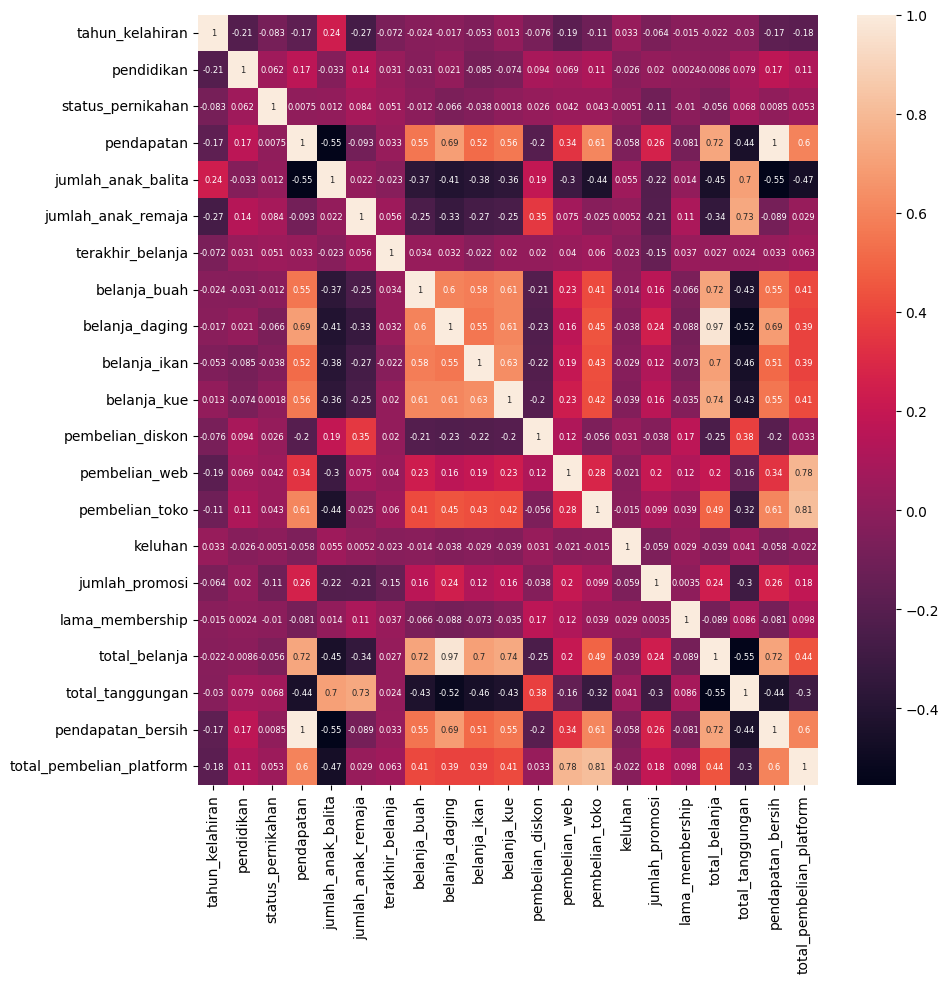

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train_null_handled_no_outlier.corr(),annot=True, annot_kws={"fontsize": 6})
plt.show()

#### Over Sampling

In [51]:
features_selected = df_train_null_handled_no_outlier.drop(columns=['jumlah_promosi']).columns
features_train = df_train_null_handled_no_outlier[features_selected].copy()
target_train = df_train_null_handled_no_outlier['jumlah_promosi'].copy()

In [52]:
len(features_selected)

20

In [53]:
features_train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,lama_membership,total_belanja,total_tanggungan,pendapatan_bersih,total_pembelian_platform
0,1979.0,3.0,2.0,1.068139e+08,0,1,25,50575.0,260967.0,50575.000000,20230.000000,2,2,5,0,3645.000000,3.823470e+05,1,1.064315e+08,7
1,1950.0,3.0,2.0,8.406300e+07,1,0,70,6069.0,44506.0,80920.000000,20230.000000,9,6,4,0,4059.000000,1.517250e+05,1,8.391128e+07,10
2,1966.0,3.0,4.0,1.275326e+08,0,0,45,117611.0,265460.0,96341.000000,145573.000000,1,1,7,0,3897.585802,6.249850e+05,0,1.269076e+08,8
3,1961.0,4.0,2.0,1.655796e+08,0,0,90,206346.0,1613901.0,27725.000000,125868.000000,0,7,8,0,3841.883547,1.973840e+06,0,1.636058e+08,15
4,1970.0,3.0,2.0,1.177032e+08,1,1,78,90563.0,311757.0,40358.000000,33875.000000,7,6,5,0,3838.709191,4.765530e+05,2,1.172266e+08,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955.0,4.0,4.0,7.819947e+07,0,0,33,6069.0,25977.0,3856.000000,5784.000000,5,1,0,0,3876.202723,4.168600e+04,0,7.815778e+07,1
3813,1947.0,5.0,2.0,1.093060e+08,0,1,44,0.0,50575.0,9216.782818,0.000000,3,6,3,0,3610.000000,5.979178e+04,1,1.092462e+08,9
3814,1974.0,4.0,4.0,1.046210e+08,0,2,68,2023.0,62713.0,8092.000000,0.000000,7,5,7,0,3824.000000,7.282800e+04,2,1.045482e+08,12
3815,1957.0,2.0,2.0,1.108500e+08,1,1,67,18207.0,70805.0,24276.000000,16303.116777,4,5,4,0,3954.000000,1.295911e+05,2,1.107204e+08,9


In [54]:
target_train

0       2.0
1       0.0
2       1.0
3       4.0
4       4.0
       ... 
3812    5.0
3813    1.0
3814    0.0
3815    0.0
3816    0.0
Name: jumlah_promosi, Length: 3801, dtype: float64

In [55]:
features_test = test_features_null_handled[features_selected].copy()
features_test.columns

Index(['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'lama_membership', 'total_belanja', 'total_tanggungan',
       'pendapatan_bersih', 'total_pembelian_platform'],
      dtype='object')

In [56]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=12345)
synthetic_features, synthetic_labels = smote.fit_resample(
    features_train, target_train)

# Convert synthetic_features and synthetic_labels into a DataFrame
synthetic_df = pd.DataFrame(synthetic_features, columns=features_train.columns)
synthetic_df['labels'] = synthetic_labels

features_train = synthetic_df.drop(columns=['labels'])
target_train = synthetic_df['labels']

In [58]:
len(features_test.columns)

20

In [59]:
len(features_train.columns)

20

#### Feature Scalling

In [60]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# Fit and transform features
scaler = StandardScaler()

scaled_train_features = pd.DataFrame(scaler.fit_transform(features_train))
scaled_test = pd.DataFrame(scaler.transform(features_test))

# # Convert scaled features array to DataFrame
# scaled_test = pd.DataFrame(scaled_test, columns=['labels'])

# # Fit and transform target
# target_scaler = RobustScaler()
# scaled_target = target_scaler.fit_transform(target_train.values.reshape(-1, 1))

# # Convert scaled target array to DataFrame
# scaled_target_train = pd.DataFrame(scaled_target, columns=['jumlah_promosi'])

# scaled_features_train


### Modelling

#### model kes

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Assuming X and y are already defined as train_features_scaled and target_train
X = scaled_train_features.copy()
y = target_train.copy()
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Define the models
models = [
    LogisticRegression(), RidgeClassifier(), SGDClassifier(), DecisionTreeClassifier(),
    RandomForestClassifier(), BaggingClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(),
    GradientBoostingClassifier(), KNeighborsClassifier(), SVC(), XGBClassifier(),
    LGBMClassifier(), CatBoostClassifier(), VotingClassifier(voting='soft',estimators=[('lgbm', LGBMClassifier()), ('rf', RandomForestClassifier()), ('xgb', XGBClassifier()), ('ect', ExtraTreesClassifier())])
]

# Define the model names
model_names = [
    'LogisticRegression', 'RidgeClassifier', 'SGDClassifier', 'DecisionTreeClassifier',
    'RandomForestClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier',
    'GradientBoostingClassifier', 'KNeighborsClassifier', 'svc', 'XGBClassifier',
    'LGBMClassifier', 'CatBoostClassifier', 'VotingClassifier'
]

# Create a scorer for f1_score
scorer = make_scorer(f1_score, average='macro')

# List to store cross-validation results
cv_results = []

# Perform k-fold cross-validation for each model
for model, name in zip(models, model_names):
    fold_scores = []  # Store fold scores for this model
    for train_index, val_index in skf.split(X, y):
        # Split data into training and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Apply SMOTE to the training set
        smote = SMOTE()
        X_train_oversampled, y_train_oversampled = smote.fit_resample(
            X_train, y_train)

        # Train model on the combined data
        model.fit(X_train_oversampled, y_train_oversampled)
        
        # model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        val_score = scorer(model, X_val, y_val)
        fold_scores.append(val_score)

    # Calculate the mean and standard deviation of fold scores
    mean_f1 = np.mean(fold_scores)
    std_f1 = np.std(fold_scores)

    # Store results
    cv_results.append(
        {'Model Name': name, 'Mean F1 Score': mean_f1, 'Std F1 Score': std_f1})

# Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Display the results
print(cv_results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3008
[LightGBM] [Info] Number of data points in the train set: 5502, number of used features: 19
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 5502, number of 

In [63]:
cv_results_df.sort_values(by=['Mean F1 Score', 'Std F1 Score'], ascending=False)

,Model Name,Mean F1 Score,Std F1 Score
6,ExtraTreesClassifier,0.880065,0.006123
14,VotingClassifier,0.874577,0.010996
4,RandomForestClassifier,0.873411,0.004260
11,XGBClassifier,0.855758,0.007668
12,LGBMClassifier,0.851489,0.009372
13,CatBoostClassifier,0.846343,0.010699
5,BaggingClassifier,0.806319,0.006543
9,KNeighborsClassifier,0.728824,0.004180
8,GradientBoostingClassifier,0.712583,0.005691
3,DecisionTreeClassifier,0.708207,0.009704


In [71]:
# Membuat objek dari kelas ExtraTreesClassifier
model = ExtraTreesClassifier()

# Melatih model menggunakan metode fit
model.fit(X, y)

# Memprediksi data test
predict = model.predict(scaled_test)

In [73]:
submission = pd.DataFrame({'ID': test_id, 'jumlah_promosi': predict})
submission.to_csv('submission_15.csv', index=False)
